In [56]:
import math
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.pyplot import pie, axis, show
from matplotlib import pyplot as plt
from matplotlib import cm as cm
%matplotlib inline


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import svm

import missingno as msno

#import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('./data/distorted_data_extra_field.csv', sep=',')

In [3]:
print(len(df))

8476


In [4]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [5]:
print(df.columns)

Index(['destinationCountry', 'roomCount', 'udid', 'email', 'phone',
       'guest_country_code', 'is_cardless', 'stars', 'type',
       'NormalizedTotalBookingPrice', 'NormalizedLowRate',
       'numberOfBookedNights', 'numberOfReviews', 'AvgUserRating', 'hotel_id',
       'hasSpecialRequest', 'hasFreeCancellation', 'cancelledOrNoShow',
       'is_internal'],
      dtype='object')


In [6]:
print(df.head())

   destinationCountry  roomCount  udid  email  phone  guest_country_code  \
0                   0          1     0      0      0                   0   
1                   1          2     1      1      1                   0   
2                   2          1     2      2      2                   0   
3                   0          1     3      3      3                   1   
4                   2          1     0      4      4                   2   

   is_cardless  stars     type  NormalizedTotalBookingPrice  \
0            0    4.0    HOTEL                          229   
1            0    1.0    HOTEL                          126   
2            0    5.0    HOTEL                         1722   
3            0    3.5  UNKNOWN                          685   
4            0    5.0    HOTEL                          427   

   NormalizedLowRate  numberOfBookedNights  numberOfReviews  AvgUserRating  \
0                166                     1              103         3.9643   
1       

In [7]:
print(len(df))

8476


In [8]:
print(df.describe().transpose())

                              count          mean            std   min  \
destinationCountry           8476.0      5.466022       7.954941   0.0   
roomCount                    8476.0      1.226522       0.625616   0.0   
udid                         8476.0   1397.110076    1144.748558   0.0   
email                        8476.0   1443.416352    1072.404235   0.0   
phone                        8476.0   1928.059934    1145.349215   0.0   
guest_country_code           8476.0      3.180864       6.232503   0.0   
is_cardless                  8476.0      0.100755       0.301022   0.0   
stars                        8476.0      3.579106       1.406001   0.0   
NormalizedTotalBookingPrice  8476.0  12153.945021  341197.625788  77.0   
NormalizedLowRate            8476.0   3651.474044   68807.478512  77.0   
numberOfBookedNights         8476.0      2.766635       2.852446   1.0   
numberOfReviews              8476.0     48.299316      49.742138   8.0   
AvgUserRating                8476.0   

In [9]:
#Number of orders that have null values
print(df.isnull().values.sum())

4238


AxesSubplot(0.125,0.125;0.698618x0.755)


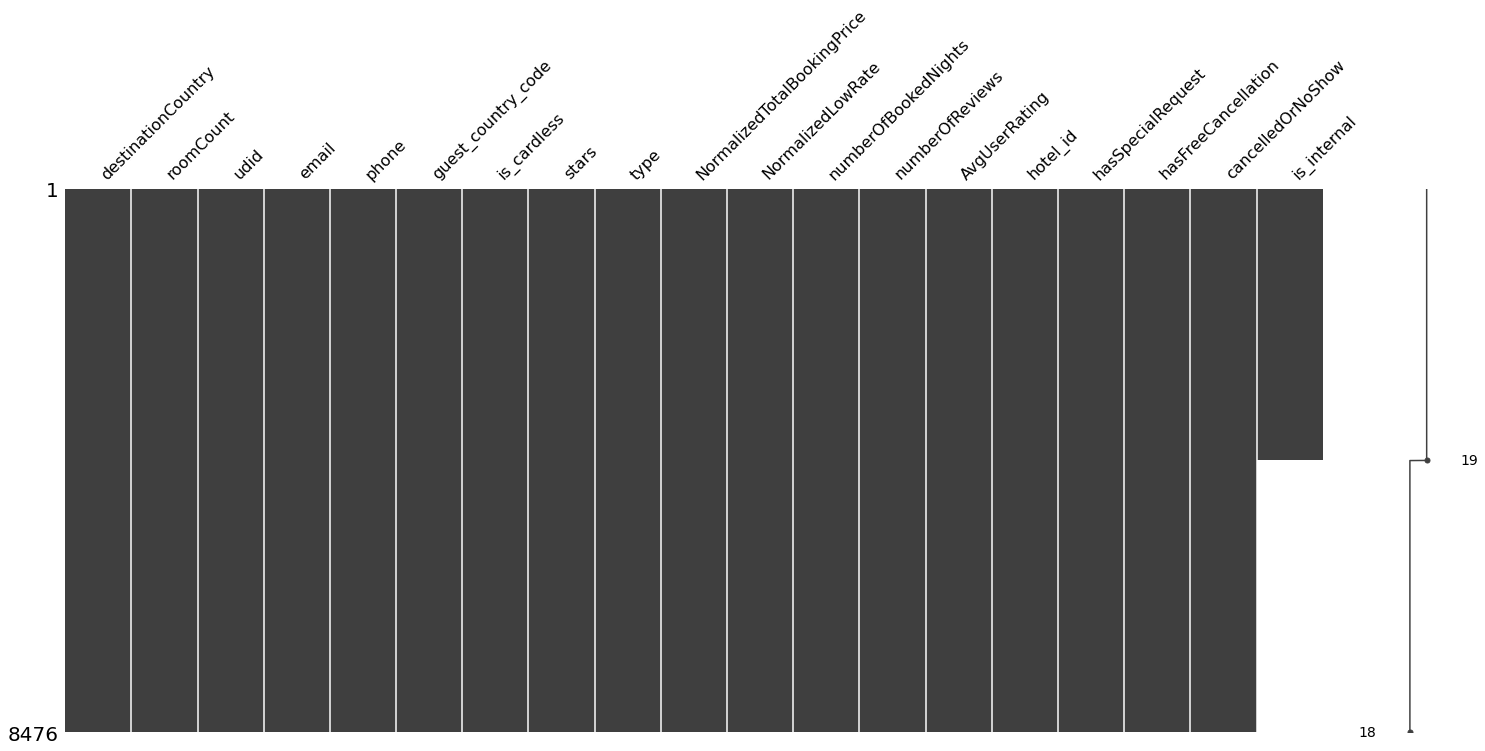

In [10]:
print(msno.matrix(df))

In [11]:
# Incrimenting ID values (to avoid keeping them as zeros)
def fillNA(data):
    data = np.array(data)
    toFloat = [float(floatValue) for floatValue in data]       #Convert to float
    biggestId = np.max(toFloat)                                #Find biggest id available (to avoid overlapping)
    print("Max id number available =", biggestId)
    
    for i in range (len(data)):
        if float(data[i]) == 0:
            data[i] = biggestId   
            biggestId = biggestId +1                           #Increment ID value
    return data

In [12]:
#Fill UDID missing data with correct values
udid = fillNA(df['udid'])
df['udid'] = udid

Max id number available = 3959.0


In [13]:
#Check number of missing values after cleaning
df.fillna(0, inplace=True)

In [14]:
nullRooms         = df.loc[df['roomCount']            <= 0 ]
noReviews         = df.loc[df['numberOfReviews']      <= 0 ]
noNights          = df.loc[df['numberOfBookedNights'] <= 0 ]
noNights          = df.loc[df['numberOfBookedNights'] <= 0 ]
avgRating         = df.loc[df['AvgUserRating']        == 0 ]


print("Number of hotels with no reviews =",len(noReviews))
print("\nNumber of orders with no nights  =",len(noNights))
print('Number of orders with no rooms   =', len(nullRooms))


print(nullRooms.head())

Number of hotels with no reviews = 0

Number of orders with no nights  = 0
Number of orders with no rooms   = 5
      destinationCountry  roomCount  udid  email  phone  guest_country_code  \
1865                   8          0  4533   1558   1794                   0   
2084                   2          0  1347   1735   1991                   0   
2620                  10          0  4771   2179   2495                   0   
4760                   2          0   519    445    518                   0   
6136                   4          0  1821   1571   1825                   0   

      is_cardless  stars   type  NormalizedTotalBookingPrice  \
1865            0    4.0  HOTEL                         1059   
2084            0    4.0  HOTEL                         8795   
2620            0    5.0  HOTEL                         5433   
4760            0    4.0  HOTEL                           93   
6136            0    4.0  HOTEL                          100   

      NormalizedLowRate  num

In [15]:
indexes_to_drop = df[df['roomCount'] == 0].index.tolist()
df.drop(df.index[indexes_to_drop], inplace=True)

In [16]:
nullRooms       = df.loc[df['roomCount']       == 0 ]

print('Number of orders with no rooms   =', len(nullRooms))

Number of orders with no rooms   = 0


In [17]:
df['AvgUserRating'] = np.round(df['AvgUserRating'], decimals=0)
print(df['AvgUserRating'].head())
print("")
df['stars'] = np.round(df['stars'], decimals=0)
print(df['stars'][:20])

0    4.0
1    1.0
2    4.0
3    4.0
4    5.0
Name: AvgUserRating, dtype: float64

0     4.0
1     1.0
2     5.0
3     4.0
4     5.0
5     3.0
6     0.0
7     0.0
8     3.0
9     4.0
10    4.0
11    5.0
12    4.0
13    4.0
14    4.0
15    5.0
16    5.0
17    4.0
18    3.0
19    4.0
Name: stars, dtype: float64


In [18]:
cancelled = df.loc[df['cancelledOrNoShow'] == 1]
print(len(cancelled) / len(df) * 100)

34.16361704639358


In [19]:
print(df.isnull().values.sum())

0


In [20]:
def add_trip_type(df):
    is_internal = []
    count_same =0
    for i in range (len(df)):
        if (df['destinationCountry'][i] == df['guest_country_code'][i]):
            #print("\nSame\nDestination Country=", df['destinationCountry'][i], "\nSource Country     =", df['guest_country_code'][i])
            count_same += 1
            is_internal.append(1)
        else:
            is_internal.append(0)
    print(count_same/len(df) * 100)
    #return is_internal

In [21]:
#add_trip_type(df)

In [22]:
destination = df[['destinationCountry', 'cancelledOrNoShow']].groupby(['destinationCountry'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(destination[:20])

    destinationCountry  cancelledOrNoShow
62                  62           1.000000
61                  61           1.000000
33                  33           0.571429
50                  50           0.500000
49                  49           0.500000
44                  44           0.500000
38                  38           0.500000
35                  35           0.500000
28                  28           0.444444
4                    4           0.432234
20                  20           0.421053
14                  14           0.392157
0                    0           0.384528
47                  47           0.375000
32                  32           0.375000
5                    5           0.373494
2                    2           0.362728
7                    7           0.358621
8                    8           0.343972
31                  31           0.343750


In [23]:
source = df[['guest_country_code', 'cancelledOrNoShow']].groupby(['guest_country_code'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(source[:20])

    guest_country_code  cancelledOrNoShow
46                  46           1.000000
38                  38           1.000000
49                  49           0.666667
42                  42           0.666667
34                  34           0.600000
22                  22           0.500000
48                  48           0.500000
47                  47           0.500000
41                  41           0.500000
29                  29           0.461538
26                  26           0.428571
25                  25           0.388889
0                    0           0.373300
11                  11           0.336478
32                  32           0.333333
44                  44           0.333333
31                  31           0.333333
28                  28           0.333333
27                  27           0.333333
9                    9           0.328571


In [24]:
property_type = df[['type', 'cancelledOrNoShow']].groupby(['type'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(property_type[:20])

                               type  cancelledOrNoShow
20                   YAMSAFER_HOMES           1.000000
17                        TOWNHOUSE           1.000000
6                            HOSTEL           1.000000
15                           RYOKAN           1.000000
12                          PENSION           0.500000
7   HOSTEL_BACKPACKER_ACCOMMODATION           0.500000
16                            SUITE           0.494681
19                            VILLA           0.470588
1                         APARTMENT           0.427586
5                       GUEST_HOUSE           0.400000
2                       APART_HOTEL           0.389381
0                     ALL_INCLUSIVE           0.370370
10                              INN           0.357143
8                             HOTEL           0.337581
13                        RESIDENCE           0.333333
9                      HOTEL_RESORT           0.272487
11                            MOTEL           0.250000
18        

In [25]:
reviews_number = df[['AvgUserRating', 'cancelledOrNoShow']].groupby(['AvgUserRating'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(reviews_number)

   AvgUserRating  cancelledOrNoShow
3            3.0           0.377739
0            0.0           0.371590
4            4.0           0.320665
1            1.0           0.311258
2            2.0           0.306452
5            5.0           0.252193


In [26]:
property_type = df[['stars', 'cancelledOrNoShow']].groupby(['stars'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(property_type)

   stars  cancelledOrNoShow
0    0.0           0.463970
1    1.0           0.417722
3    3.0           0.371326
4    4.0           0.337815
2    2.0           0.330961
5    5.0           0.276524


In [27]:
property_type = df[['hasSpecialRequest', 'cancelledOrNoShow']].groupby(['hasSpecialRequest'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(property_type)

   hasSpecialRequest  cancelledOrNoShow
0                  0           0.344743
1                  1           0.321010


In [28]:
property_type = df[['hasFreeCancellation', 'cancelledOrNoShow']].groupby(['hasFreeCancellation'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(property_type)

   hasFreeCancellation  cancelledOrNoShow
1                    1           0.421681
0                    0           0.316718


In [29]:
property_type = df[['is_internal', 'cancelledOrNoShow']].groupby(['is_internal'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(property_type)

   is_internal  cancelledOrNoShow
1          1.0           0.345885
0          0.0           0.340442


In [30]:
property_type = df[['is_cardless', 'cancelledOrNoShow']].groupby(['is_cardless'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(property_type)

   is_cardless  cancelledOrNoShow
1            1           0.487119
0            0           0.325325


In [31]:
property_type = df[['numberOfBookedNights', 'cancelledOrNoShow']].groupby(['numberOfBookedNights'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(property_type[:30])

    numberOfBookedNights  cancelledOrNoShow
29                    30           1.000000
28                    29           1.000000
26                    27           1.000000
21                    22           1.000000
31                    34           1.000000
18                    19           1.000000
30                    31           1.000000
19                    20           0.833333
12                    13           0.818182
16                    17           0.666667
25                    26           0.600000
27                    28           0.571429
10                    11           0.565217
7                      8           0.525773
8                      9           0.513158
22                    23           0.500000
14                    15           0.500000
23                    24           0.500000
13                    14           0.480000
5                      6           0.426295
4                      5           0.420690
9                     10        

In [32]:
property_type = df[['roomCount', 'cancelledOrNoShow']].groupby(['roomCount'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=False)
print(property_type[:30])

    roomCount  cancelledOrNoShow
9          10           1.000000
6           7           0.750000
7           8           0.428571
2           3           0.401015
5           6           0.400000
3           4           0.377358
1           2           0.342489
0           1           0.339365
4           5           0.294118
8           9           0.000000
10         13           0.000000


In [33]:
cancelled_orders = df.loc[df['cancelledOrNoShow'] == 1]

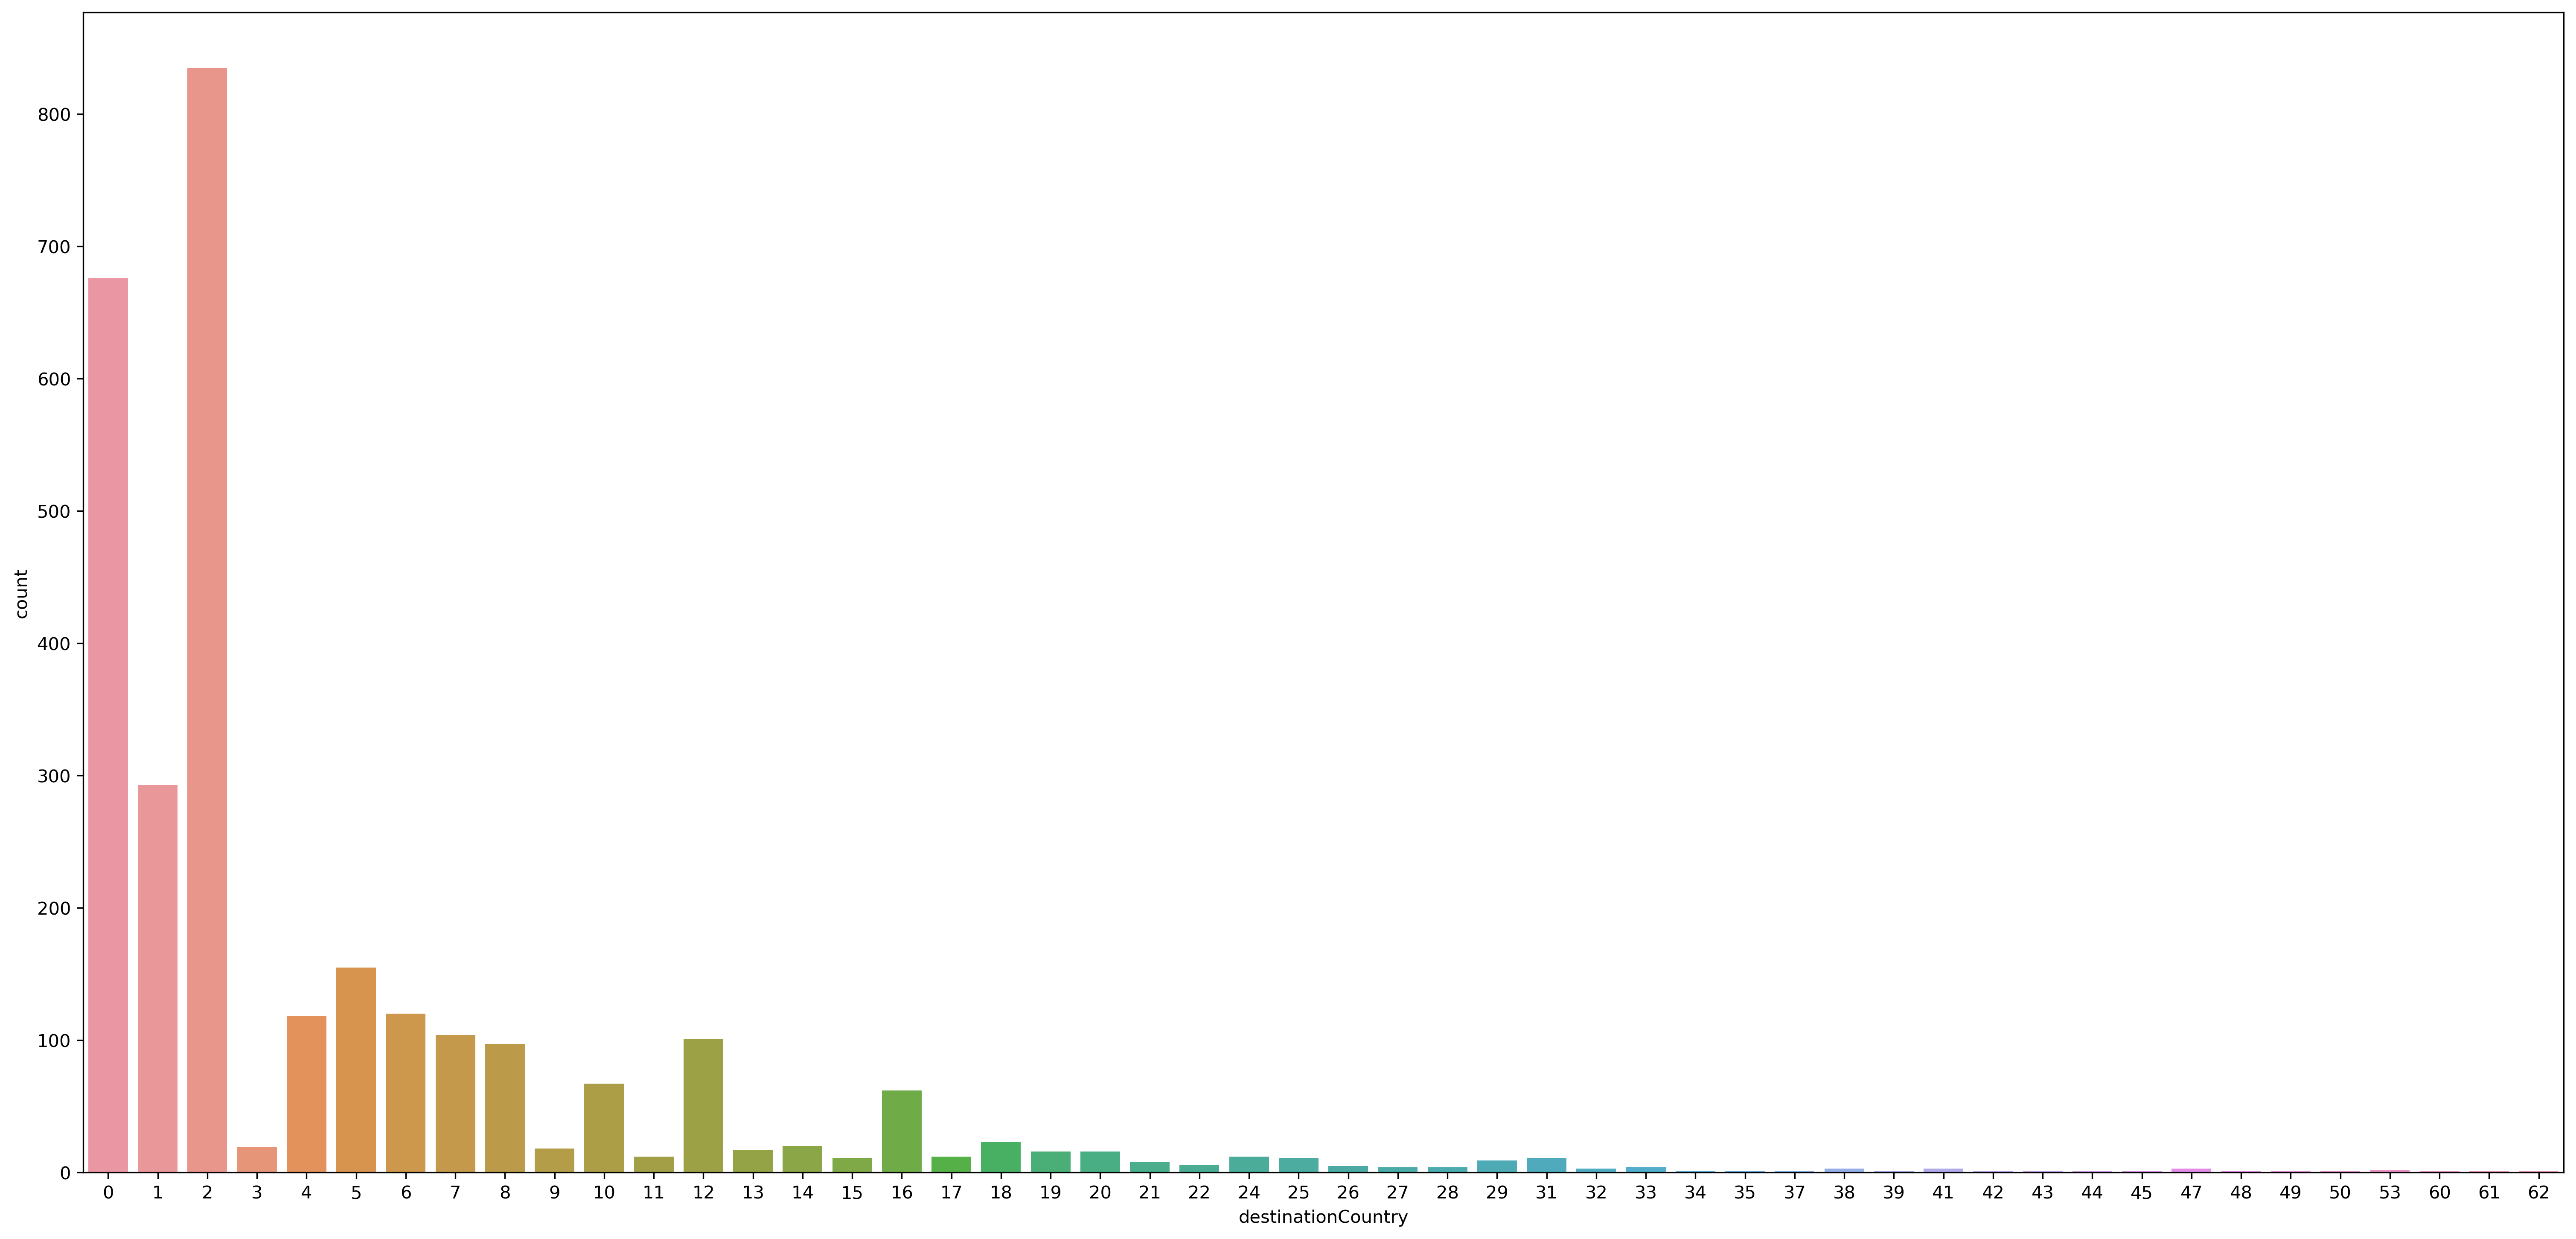

In [34]:
# Plot the number of destination countries for cancelled orders

plt.figure(figsize=(25,12), dpi=300)
p = sns.countplot(x="destinationCountry", data=cancelled_orders)
plt.show()

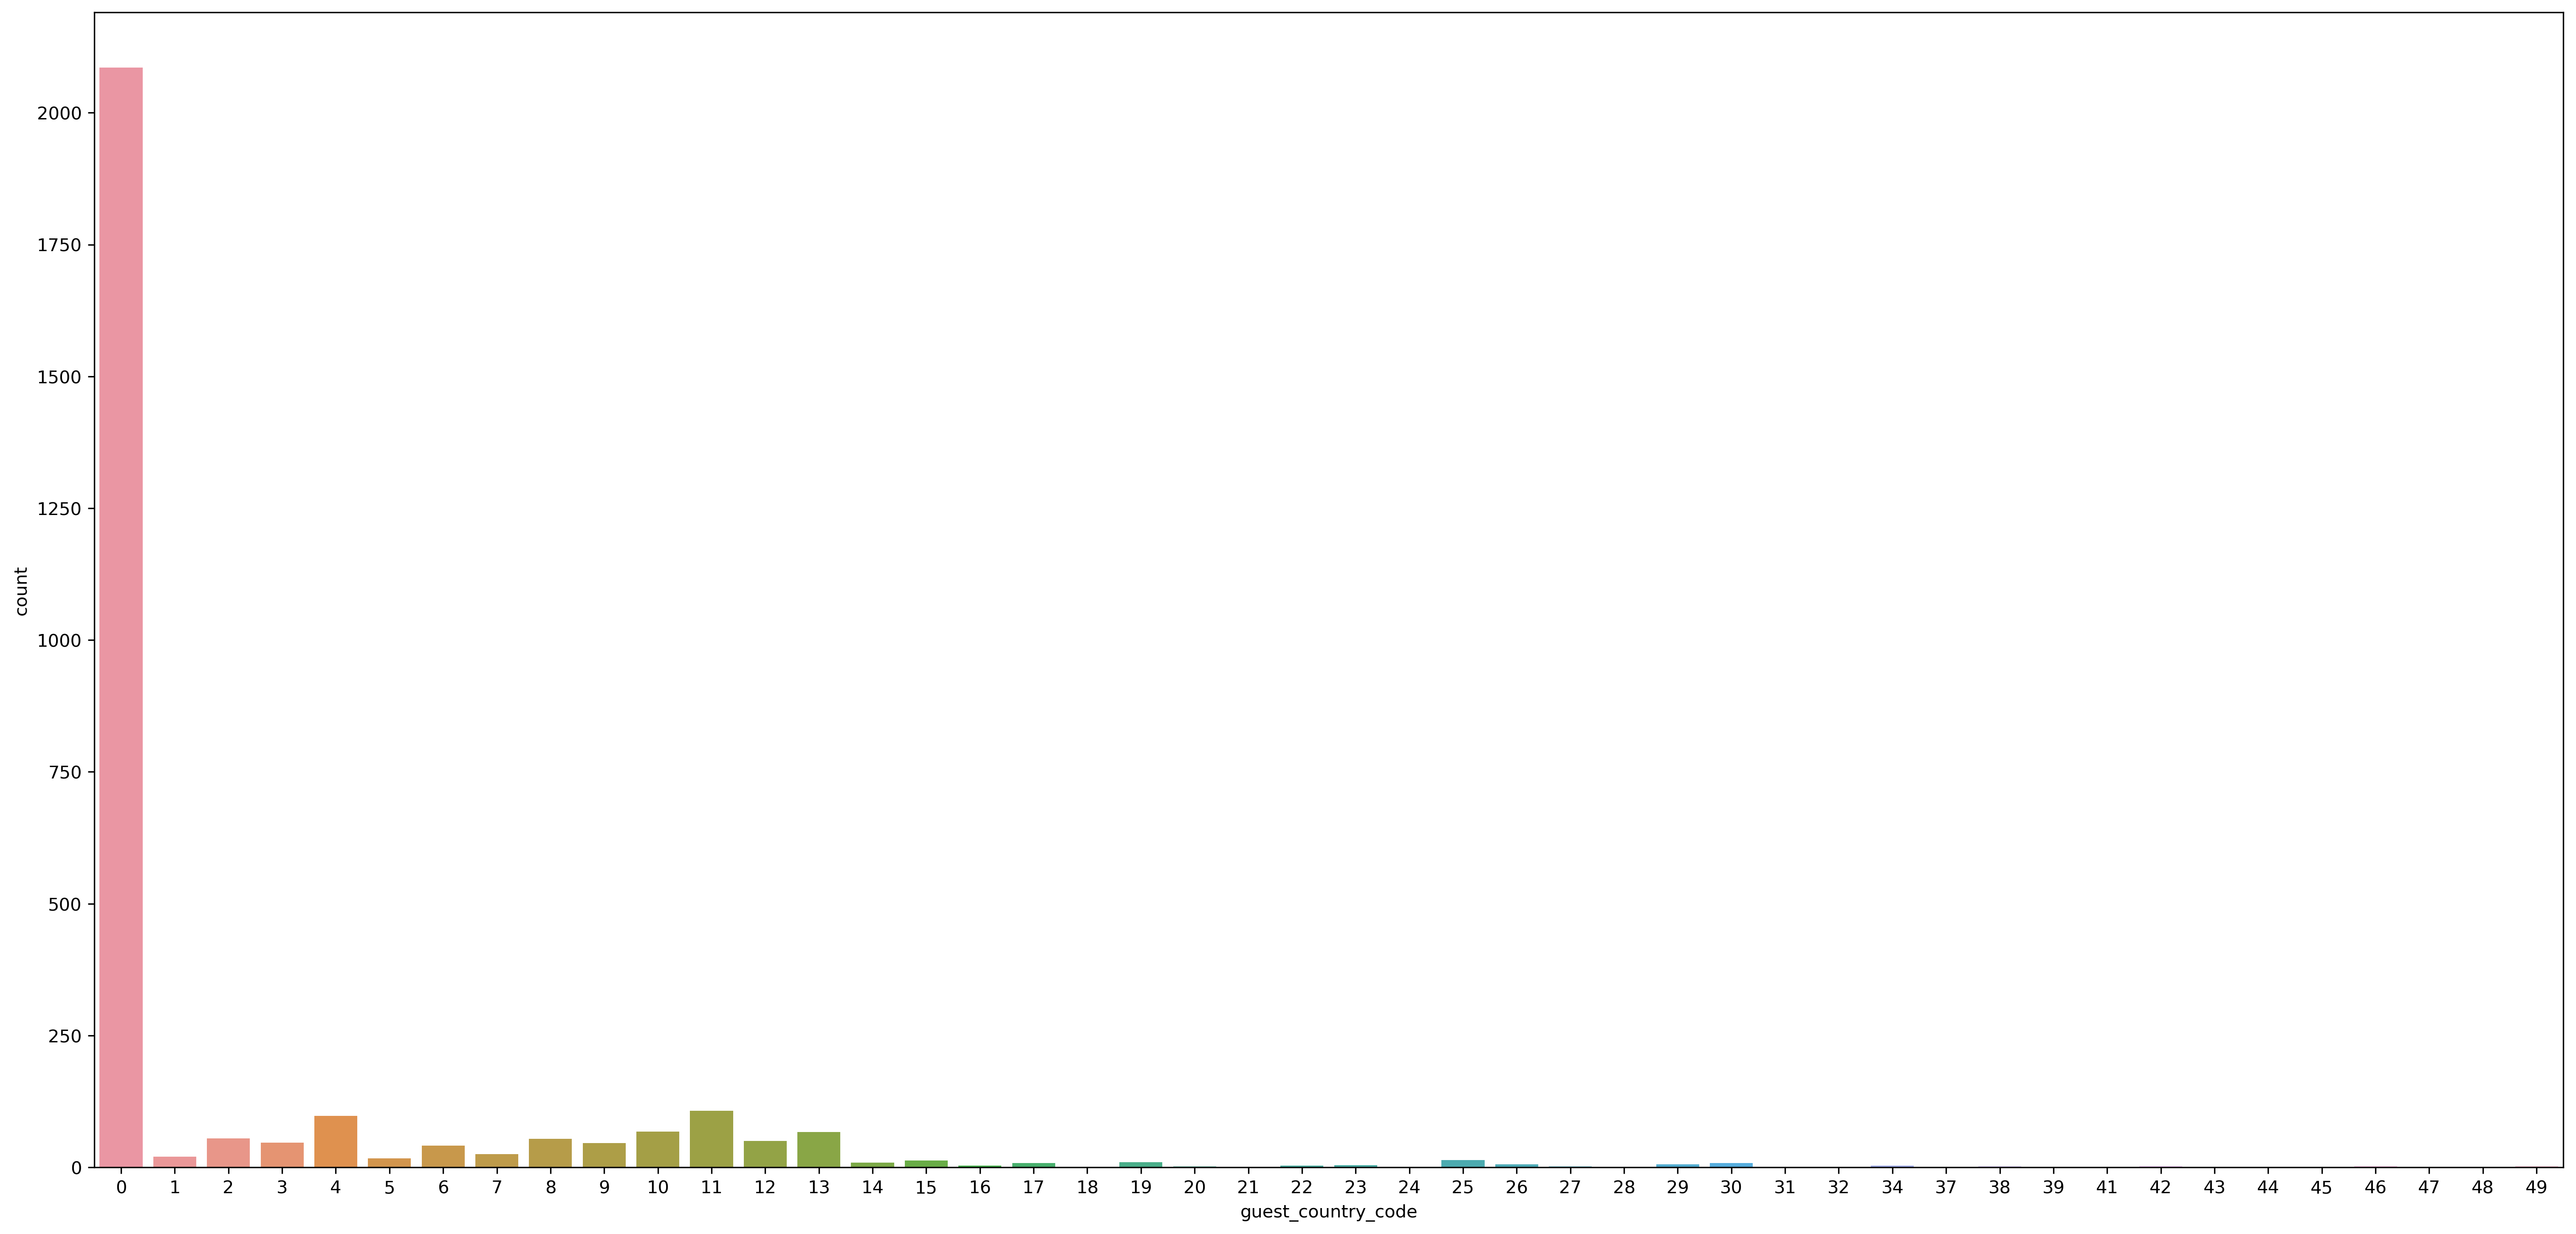

In [35]:
# Plot the number of destination countries for cancelled orders
plt.figure(figsize=(25,12), dpi=300)
p = sns.countplot(x="guest_country_code", data=cancelled_orders)
plt.show()

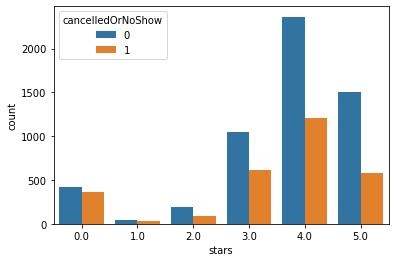

In [36]:
sns.countplot(x='stars', hue='cancelledOrNoShow', data=df)
plt.show()

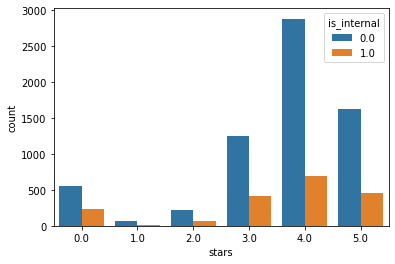

In [37]:
sns.countplot(x='stars', hue='is_internal', data=df)
plt.show()

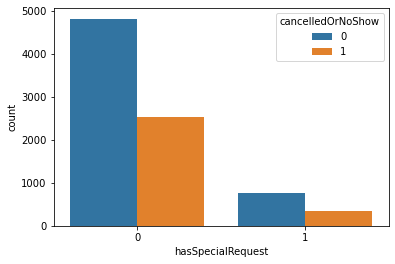

In [38]:
sns.countplot(x='hasSpecialRequest', hue='cancelledOrNoShow', data=df)
plt.show()

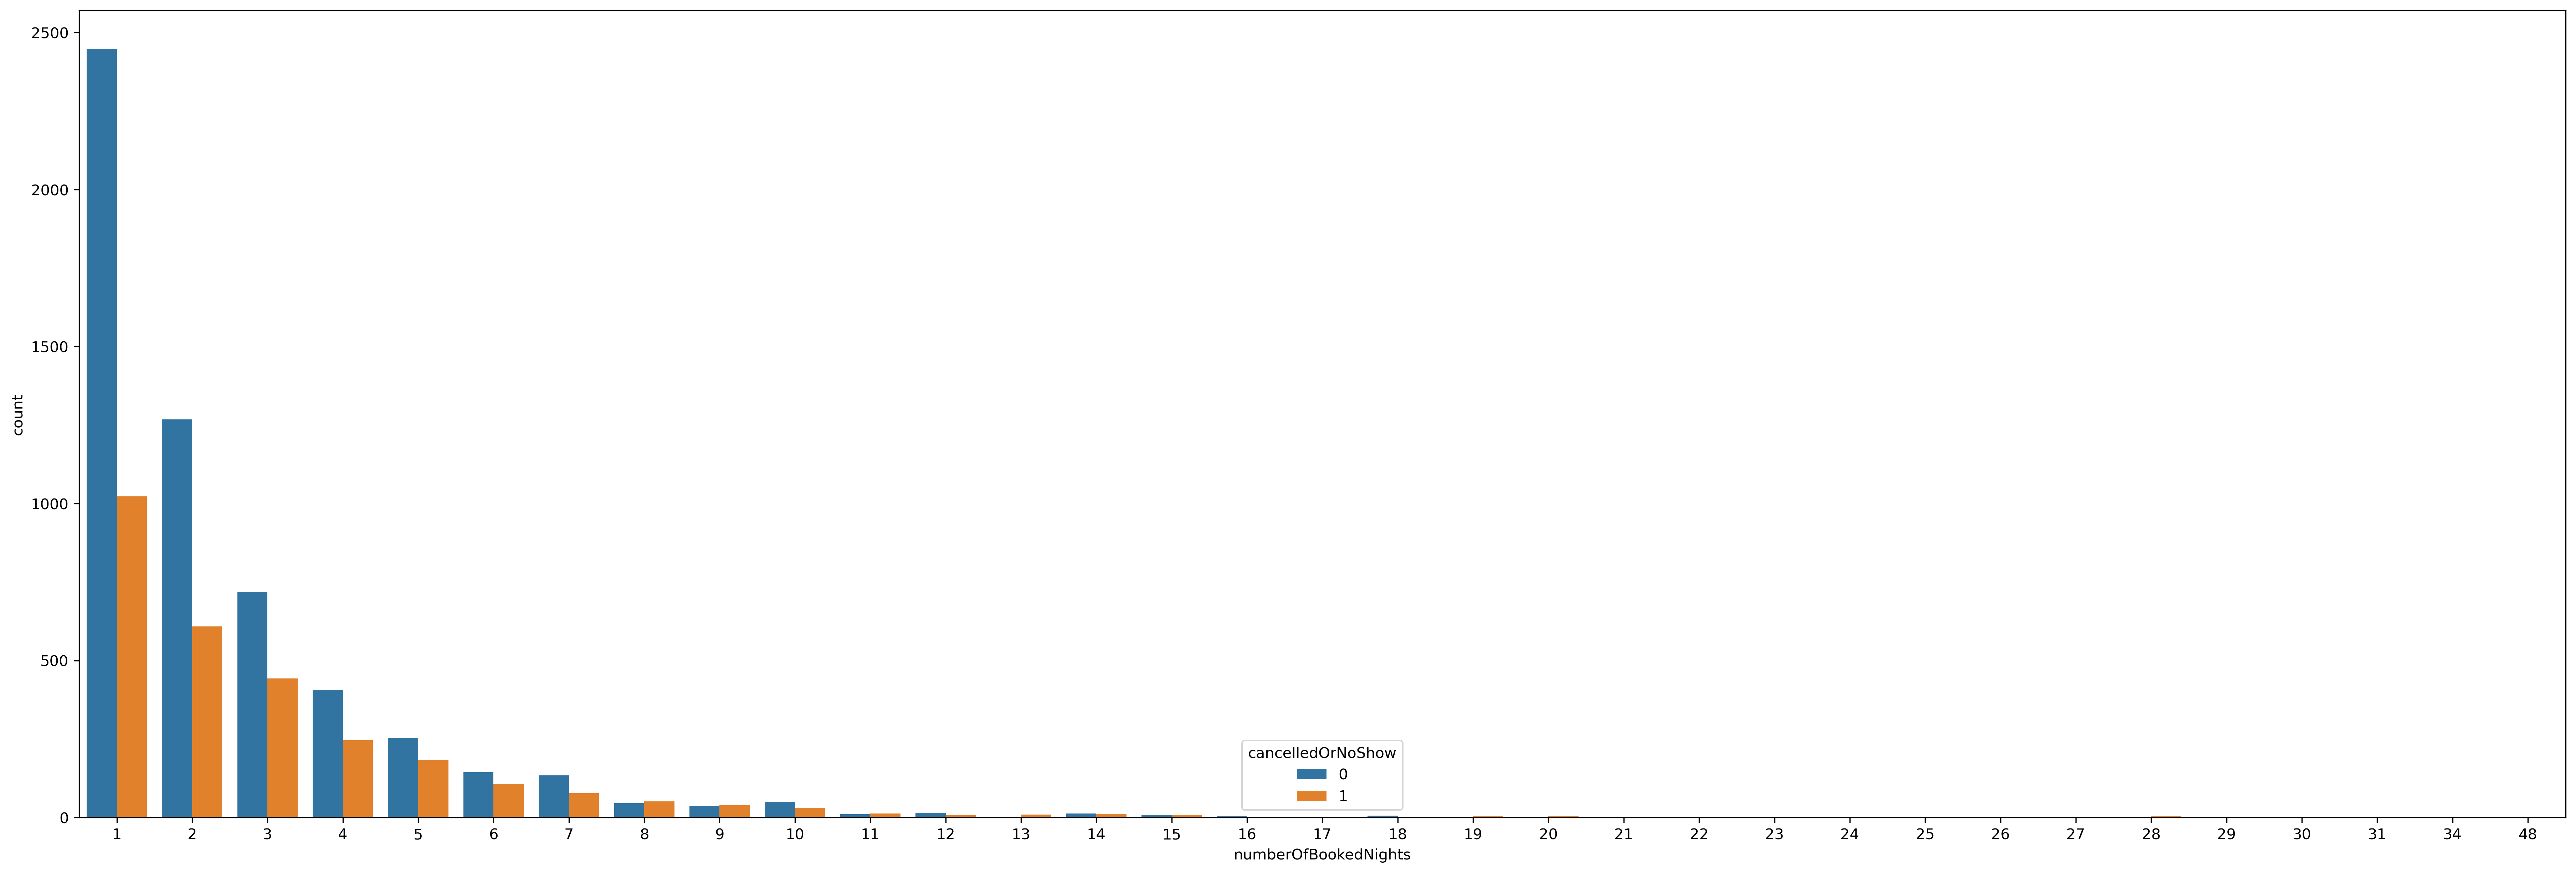

In [39]:
plt.figure(figsize=(30,10), dpi=300)
sns.countplot(x='numberOfBookedNights', hue= 'cancelledOrNoShow', data=df)
plt.show()

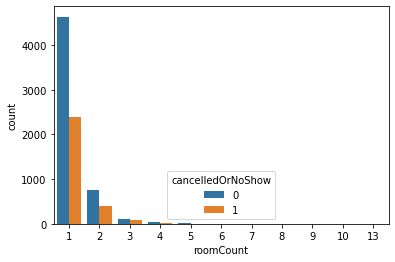

In [40]:
sns.countplot(x='roomCount', hue= 'cancelledOrNoShow', data=df)
plt.show()

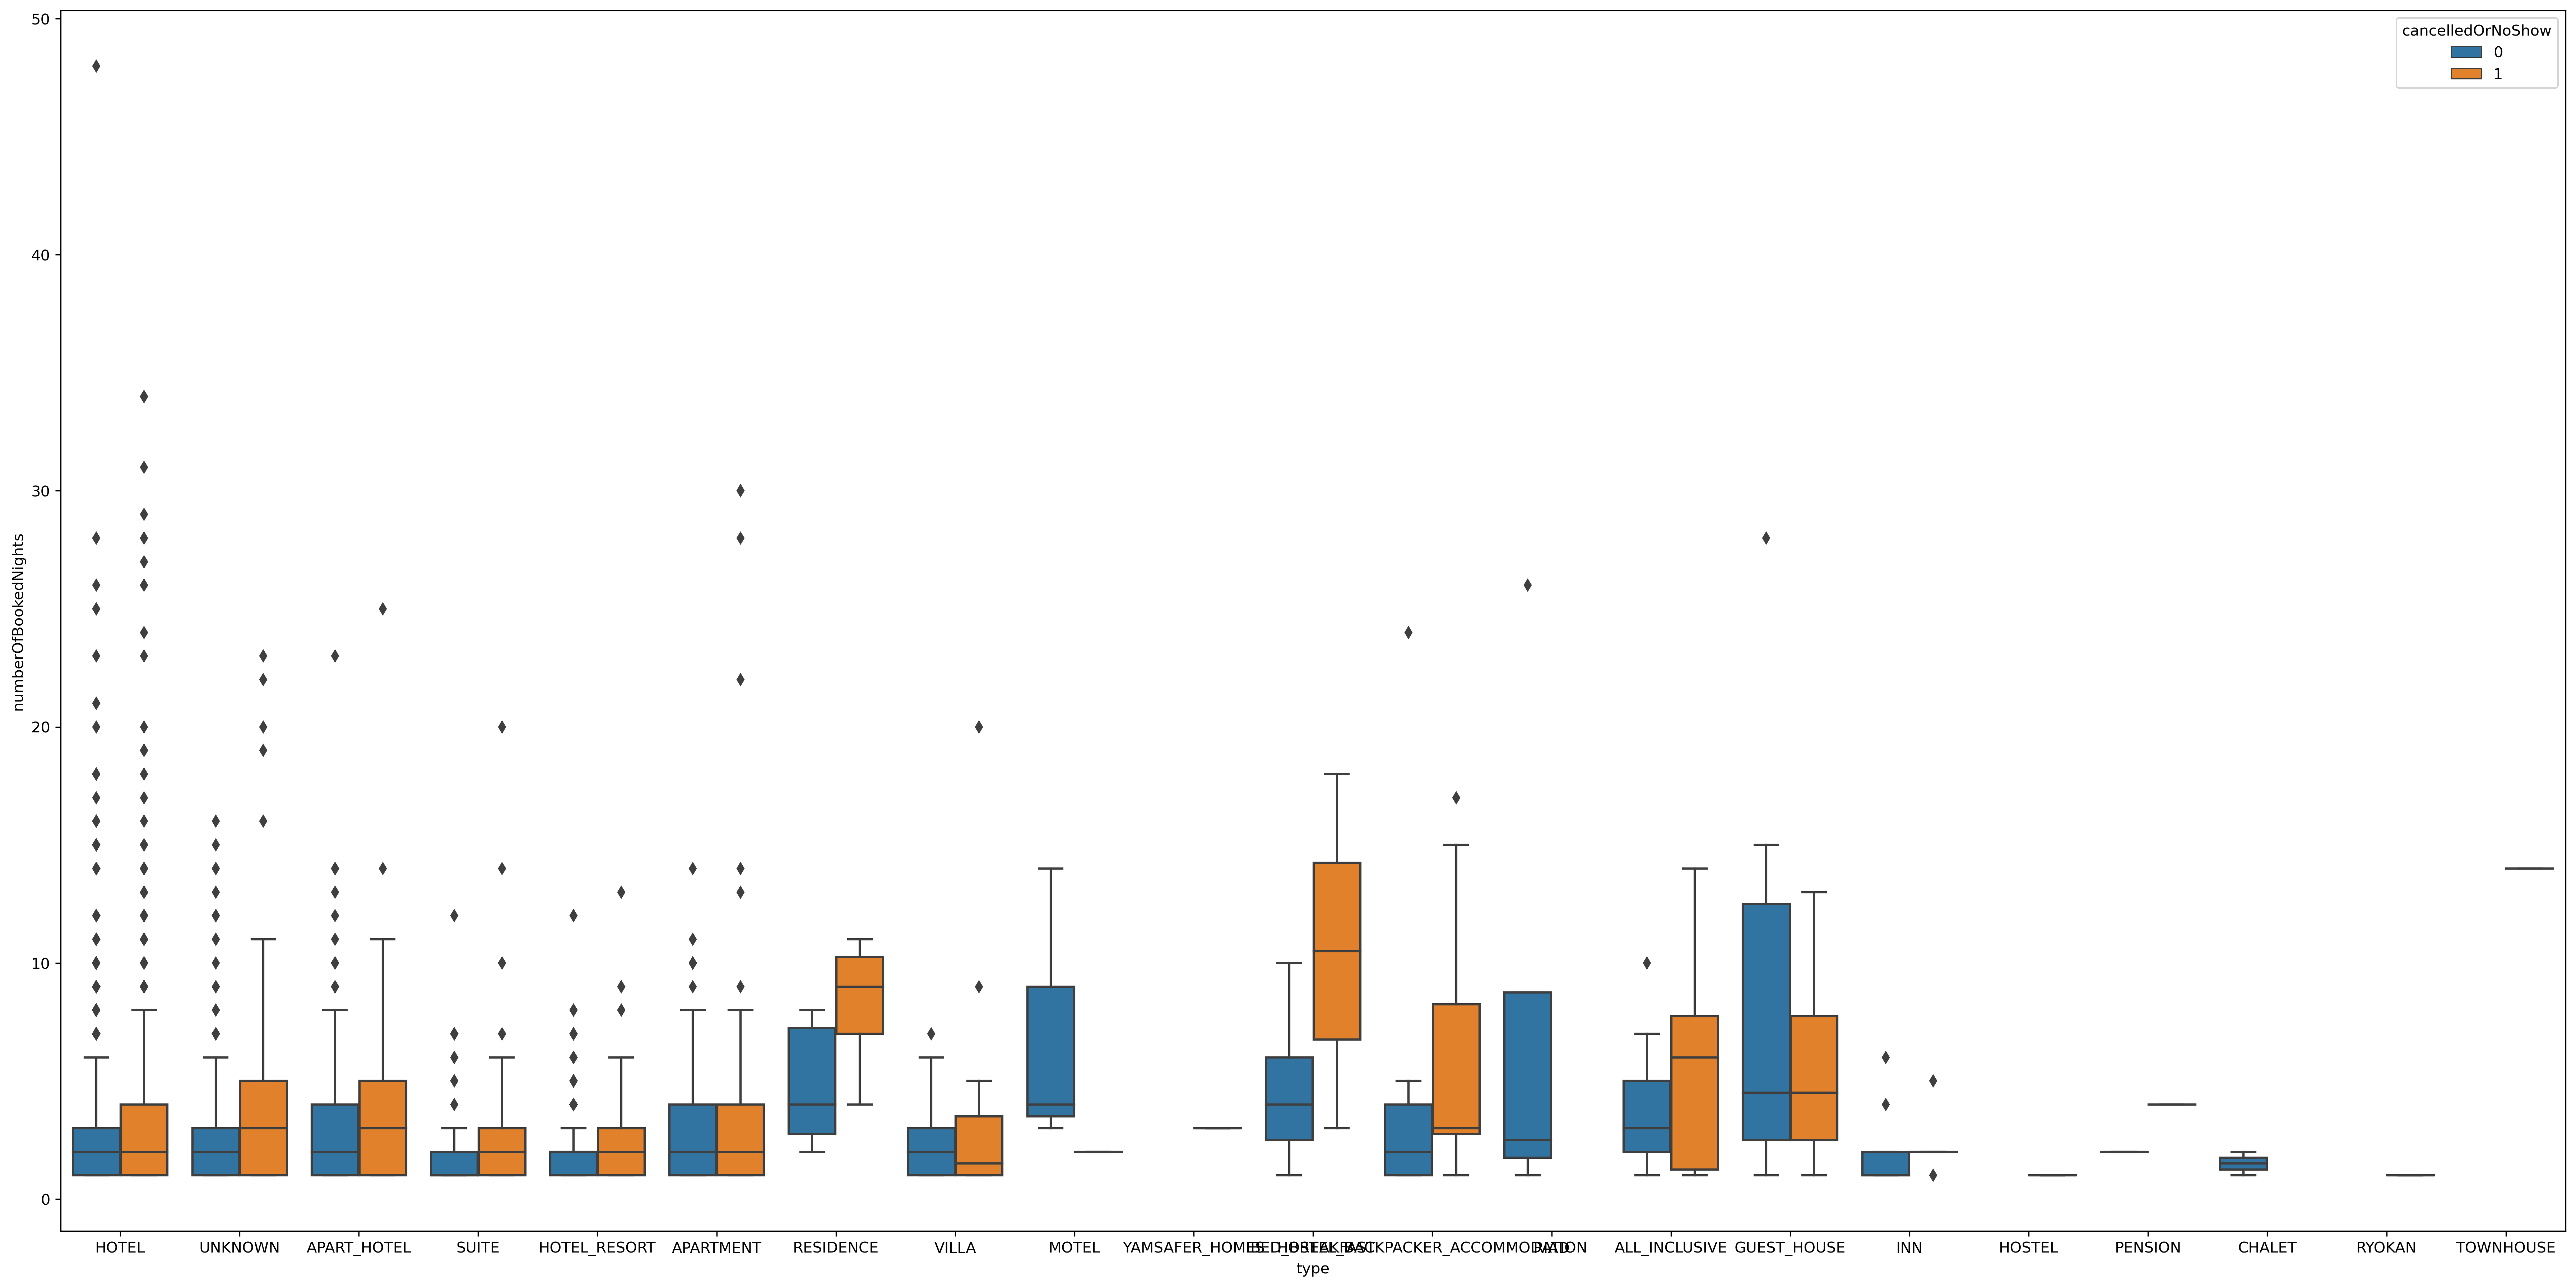

In [41]:
plt.figure(figsize=(30,15), dpi=300)
sns.boxplot(x='type', y='numberOfBookedNights', hue='cancelledOrNoShow', data=df)
plt.show()

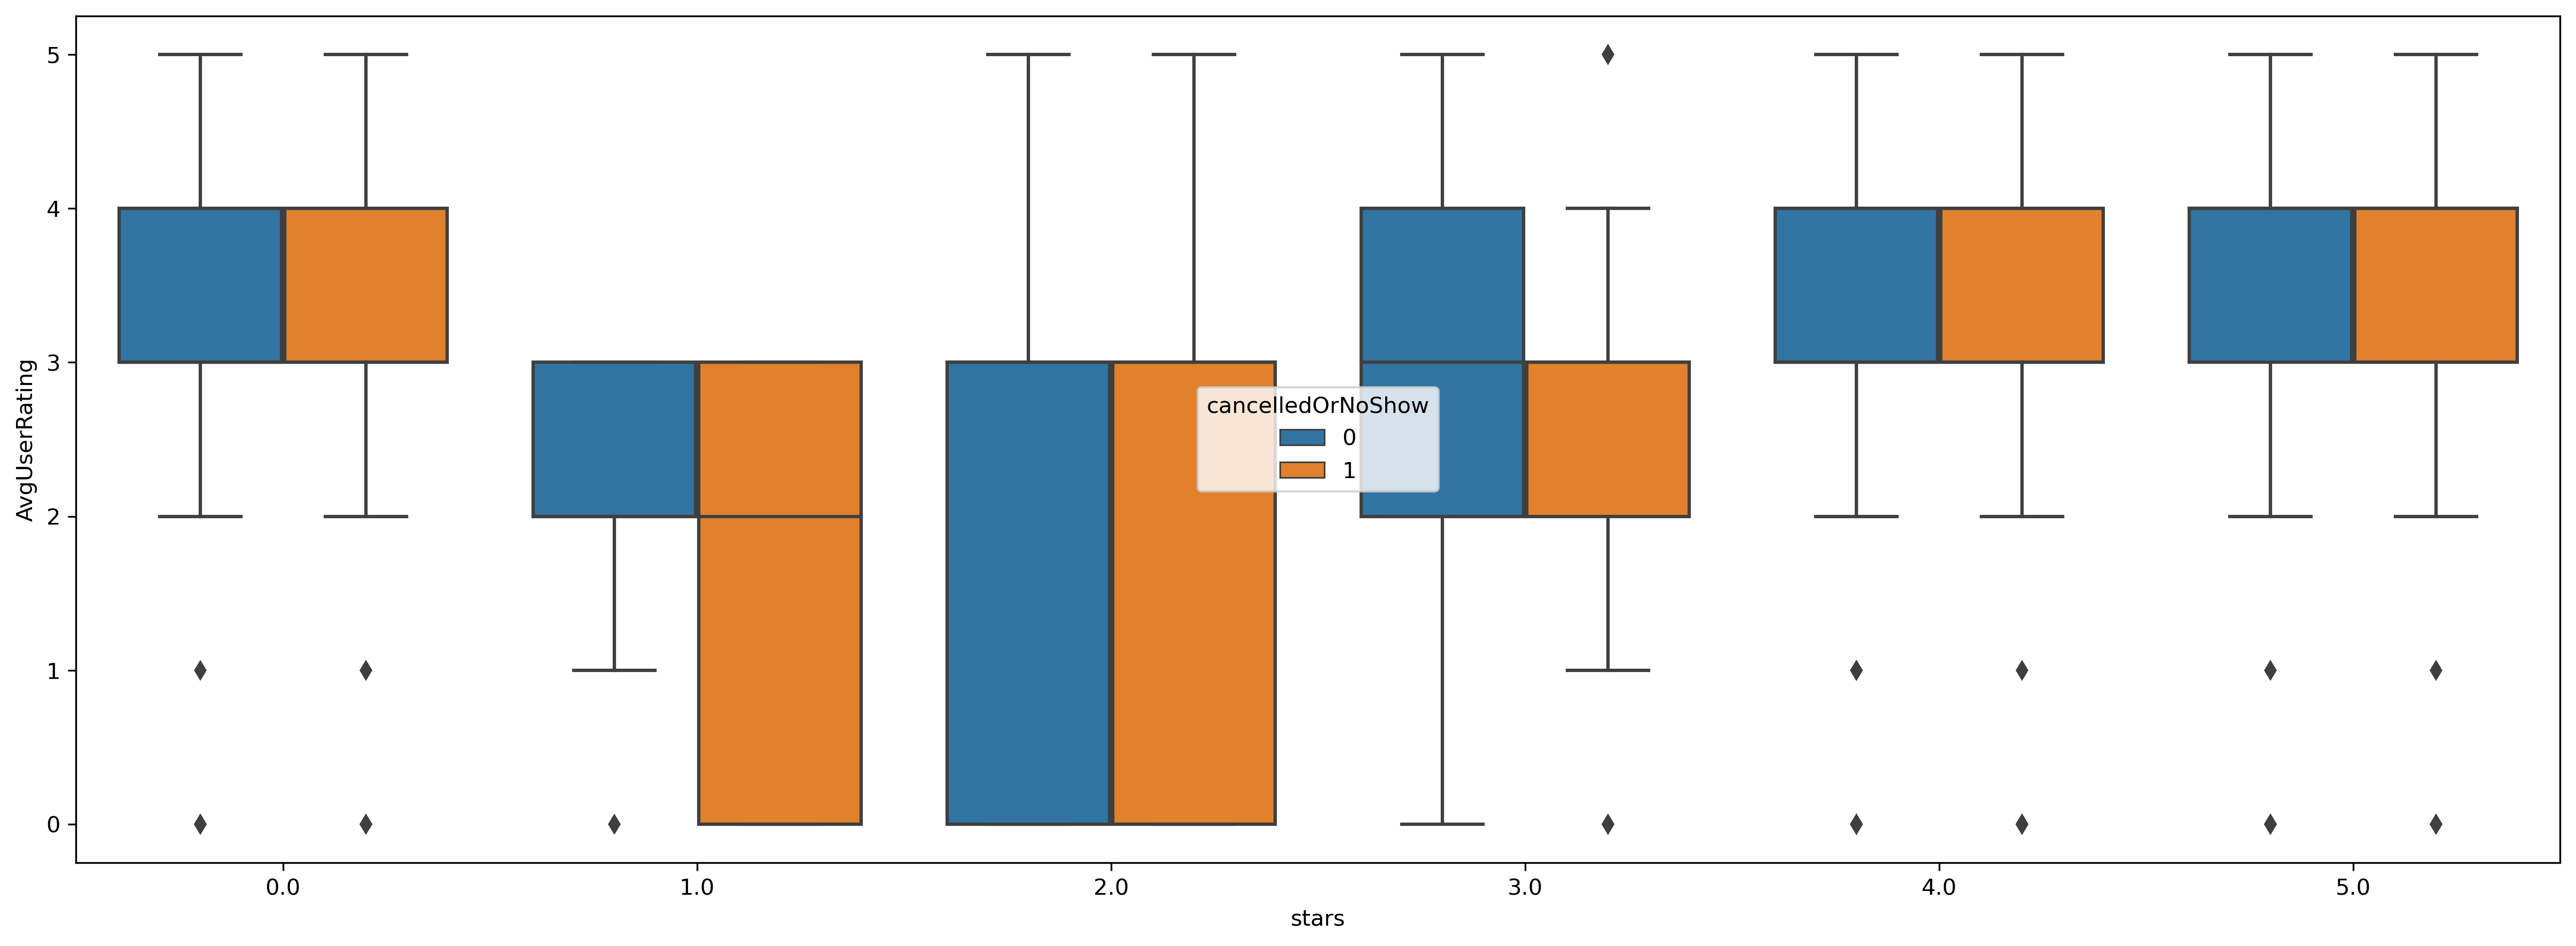

In [42]:
plt.figure(figsize=(20,7), dpi=300)
sns.boxplot(x='stars', y='AvgUserRating', hue= 'cancelledOrNoShow', data=df)
plt.show()

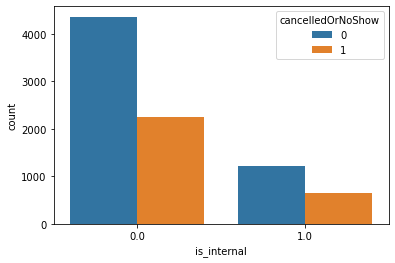

In [43]:
sns.countplot(x='is_internal', hue='cancelledOrNoShow', data=df)
plt.show()

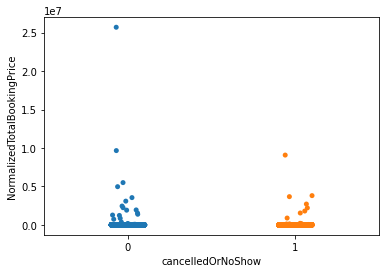

In [44]:
sns.stripplot(x="cancelledOrNoShow", y="NormalizedTotalBookingPrice", data=df);

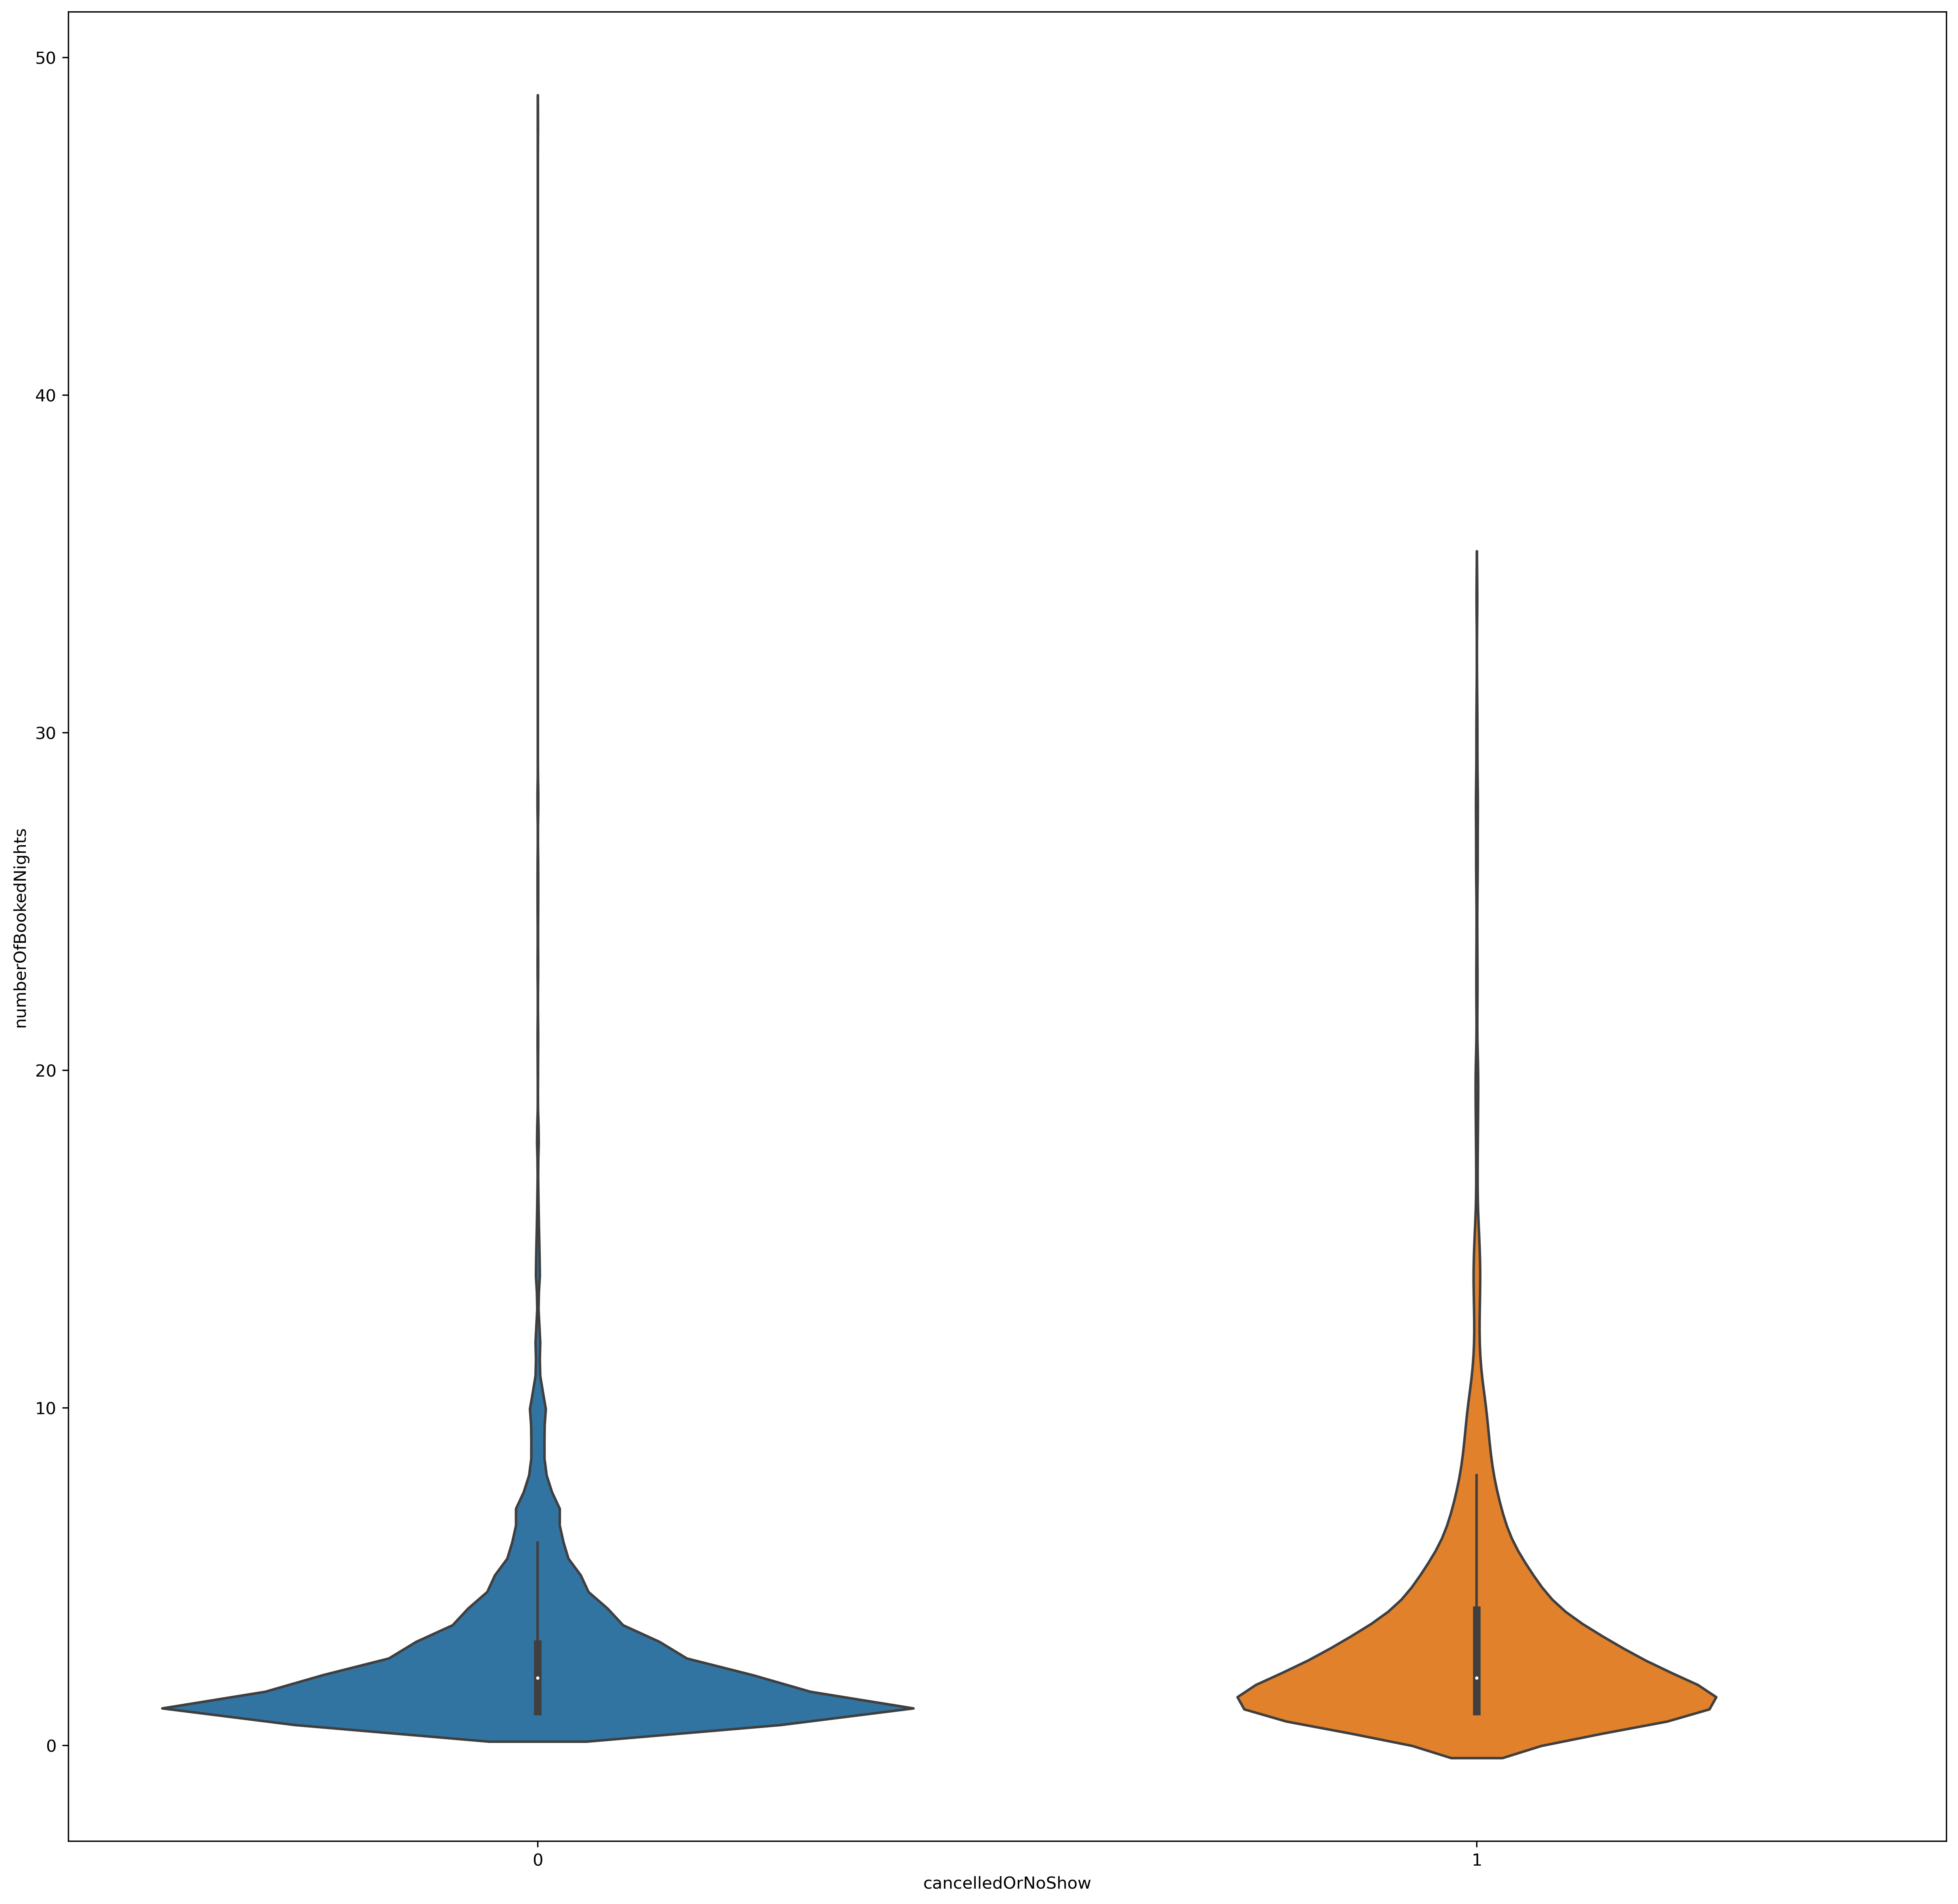

In [45]:
plt.figure(figsize=(20,20), dpi=300)
sns.violinplot(x="cancelledOrNoShow", y="numberOfBookedNights", data=df, split=True);

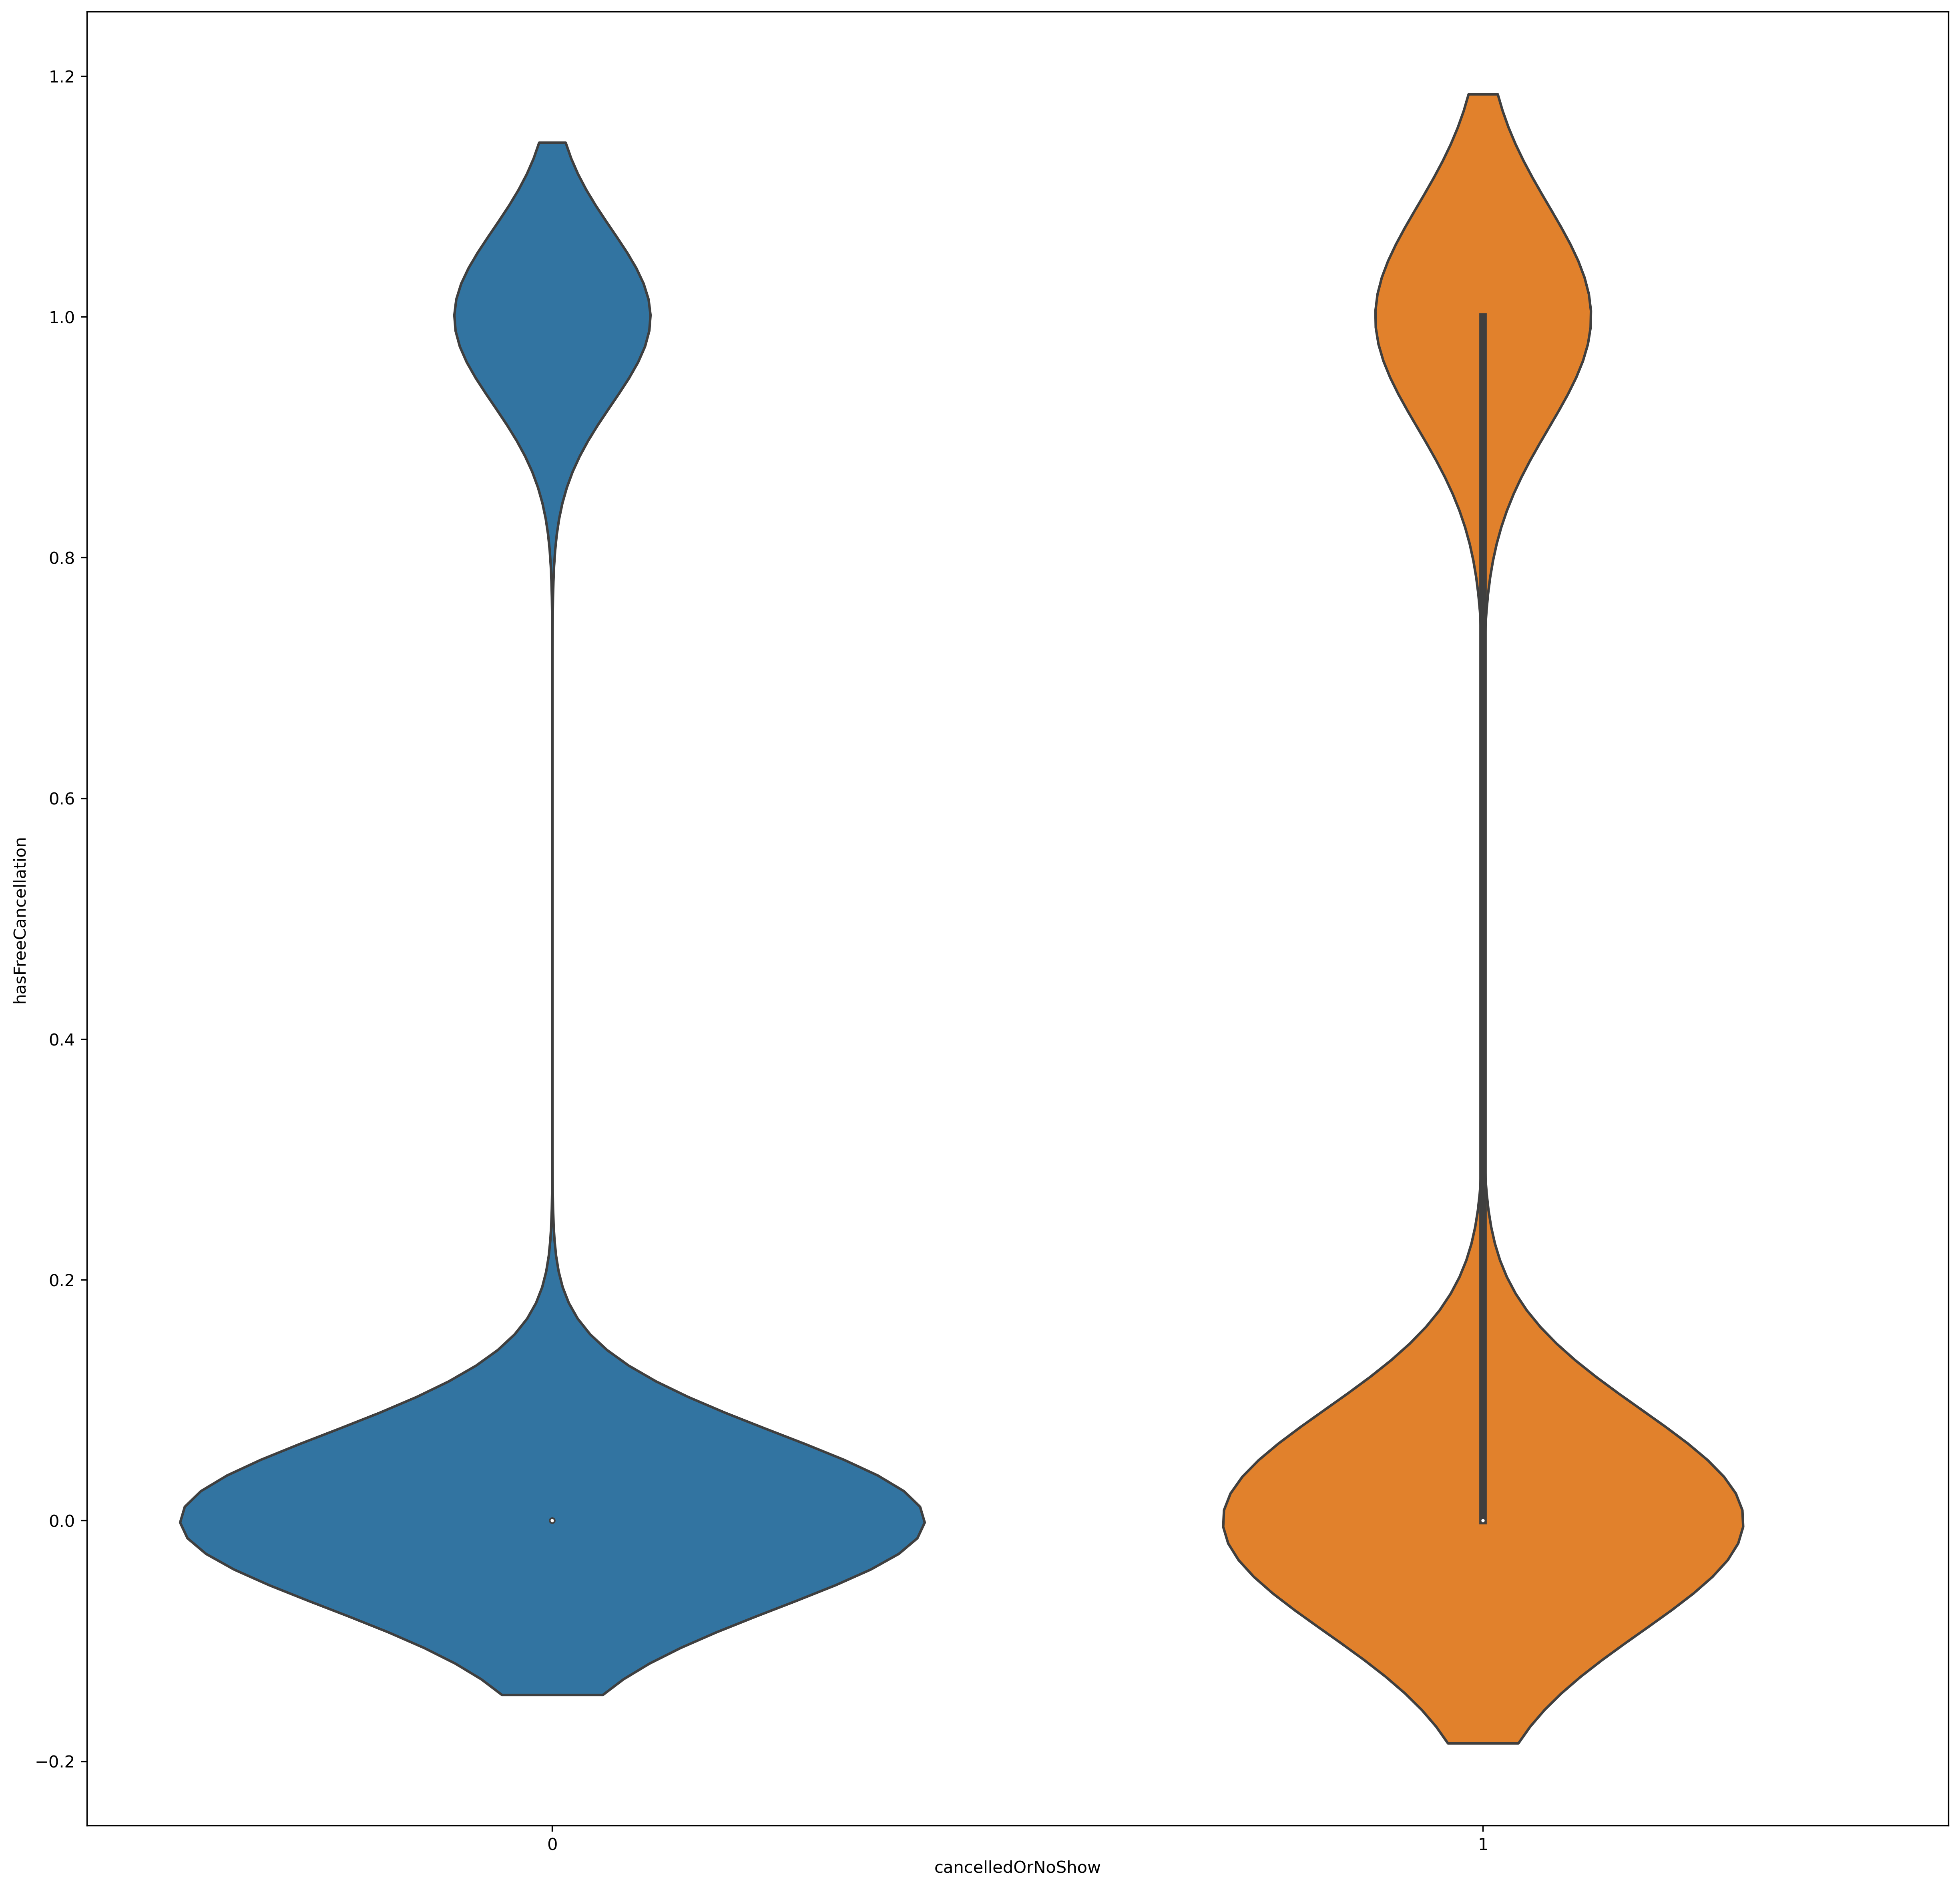

In [46]:
plt.figure(figsize=(20,20), dpi=300)
#axis(side=1,at=1:19)
sns.violinplot(x="cancelledOrNoShow", y="hasFreeCancellation", data=df, split=True);

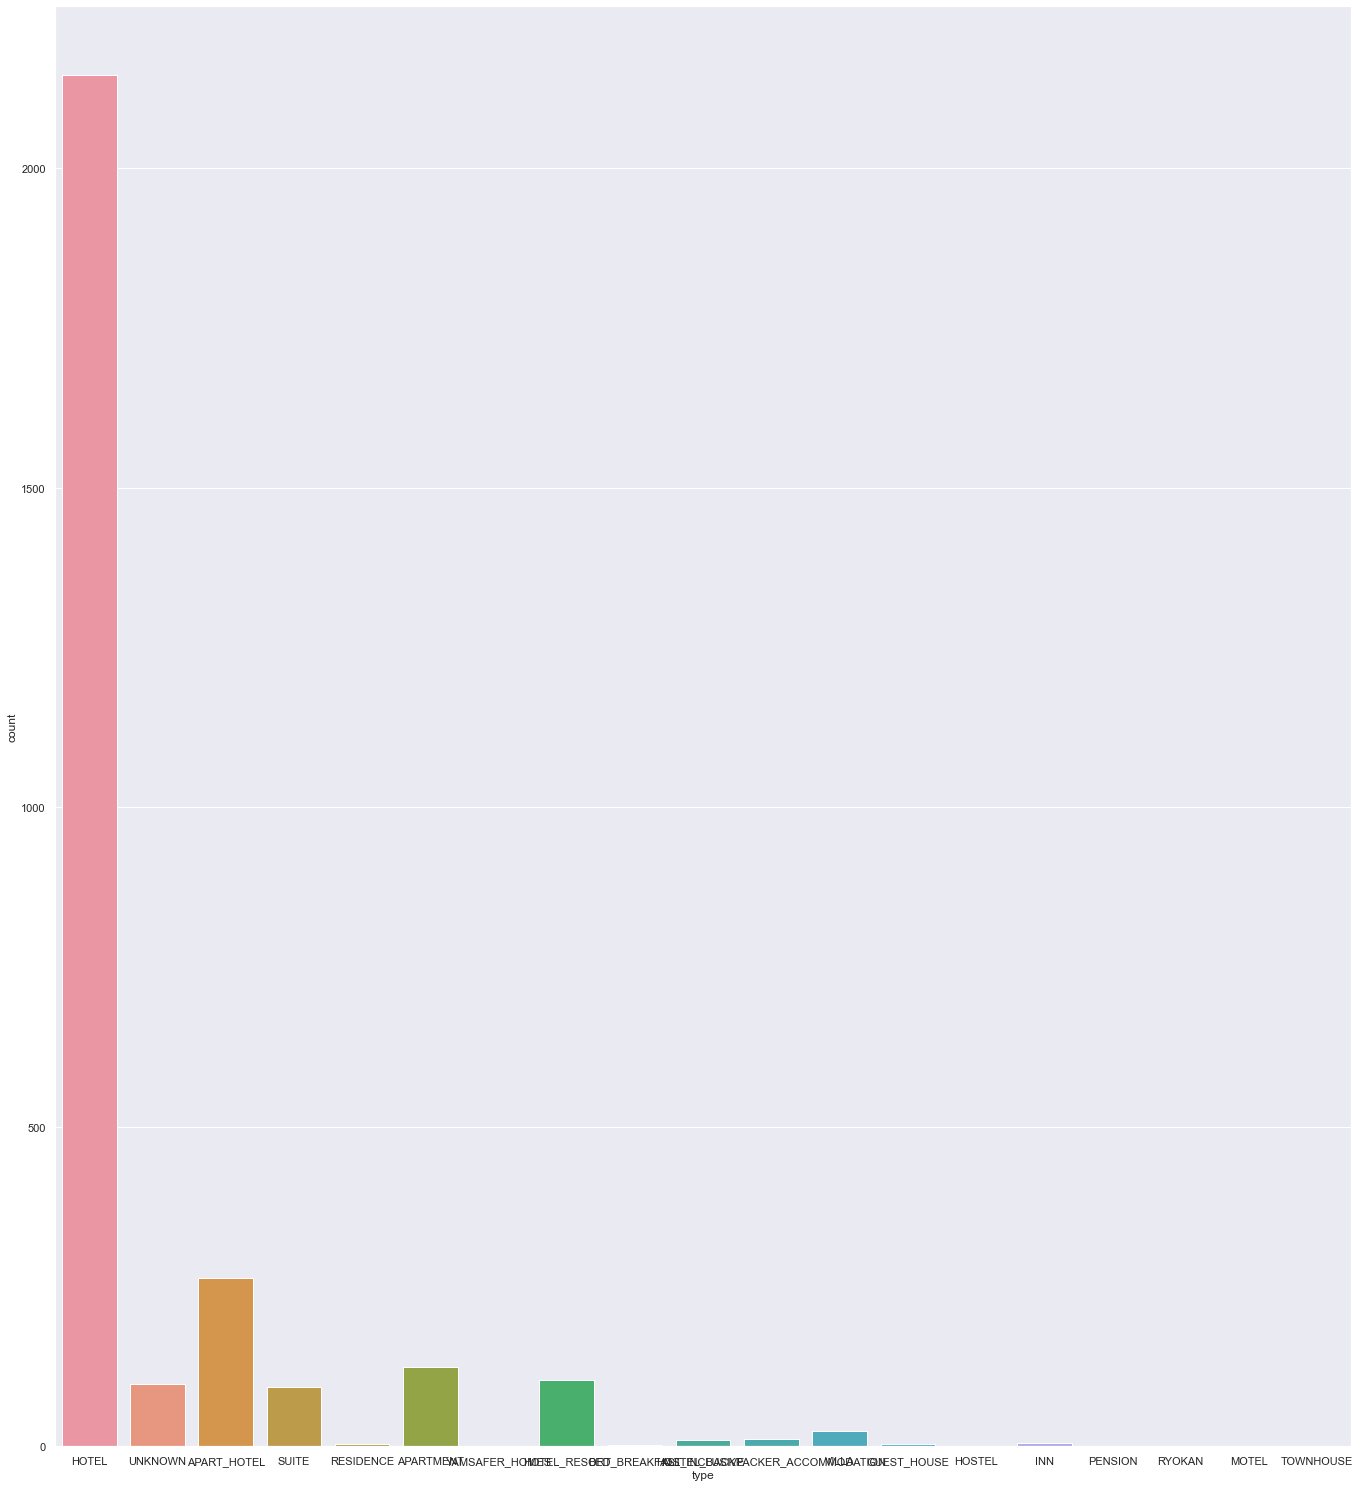

In [47]:
sns.set()
ax2 = plt.axes([0, 2, 3, 5])
sns.countplot(x='type', data=cancelled_orders)
plt.show()

In [48]:
labels, levels = pd.factorize(df['type'])
df['type']= labels

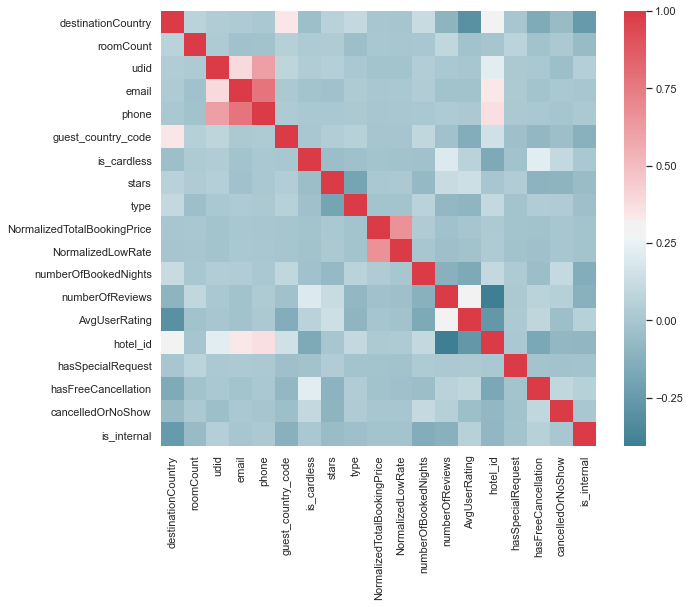

In [49]:
sns.set()
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [50]:
print(df.columns)

Index(['destinationCountry', 'roomCount', 'udid', 'email', 'phone',
       'guest_country_code', 'is_cardless', 'stars', 'type',
       'NormalizedTotalBookingPrice', 'NormalizedLowRate',
       'numberOfBookedNights', 'numberOfReviews', 'AvgUserRating', 'hotel_id',
       'hasSpecialRequest', 'hasFreeCancellation', 'cancelledOrNoShow',
       'is_internal'],
      dtype='object')


In [74]:
df_target        = df['cancelledOrNoShow']
df_feat_all      = df.drop(['cancelledOrNoShow'], axis=1)
df_feat_selected = df[['is_cardless', 'numberOfBookedNights', 'hasFreeCancellation', 'hasSpecialRequest']]

In [61]:
logreg = LogisticRegression(solver="lbfgs", n_jobs=2)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feat_all,df_target)

In [68]:
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

print(logreg.score(X_test, Y_test))

0.657695939565628


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feat_selected,df_target)

In [76]:
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

print(logreg.score(X_test, Y_test))

0.6496694995278565
